In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries, slic
from skimage.morphology import remove_small_objects
from matplotlib import patches

from enum import Enum
from typing import Any, List, Literal

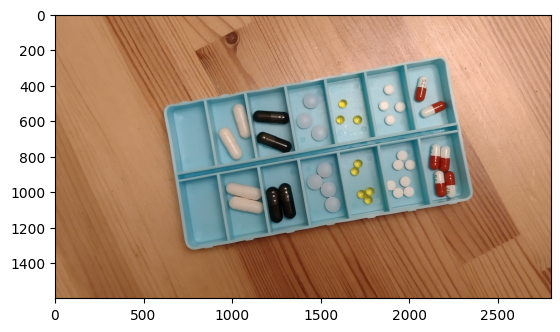

In [3]:
src = cv2.imread('calib.png')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()

# LINE

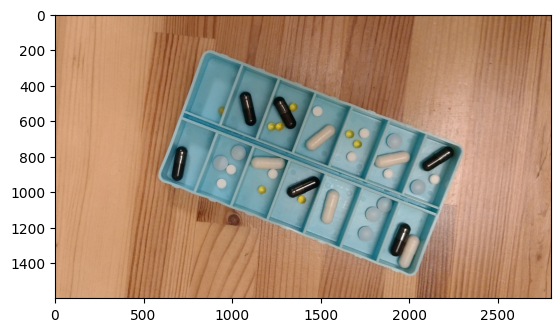

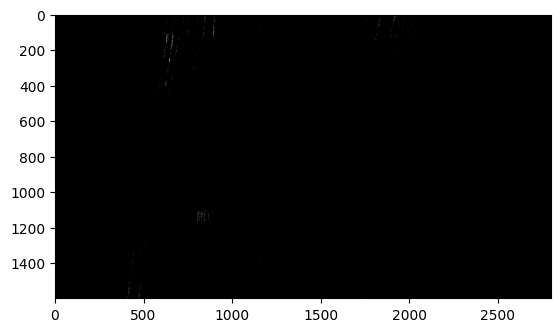

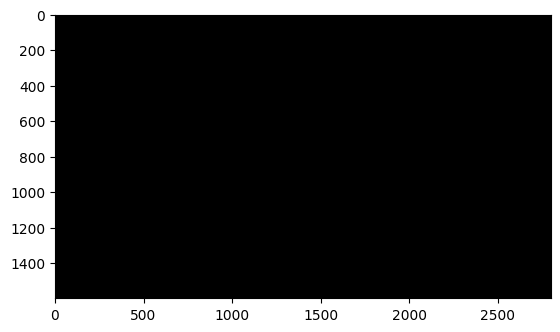

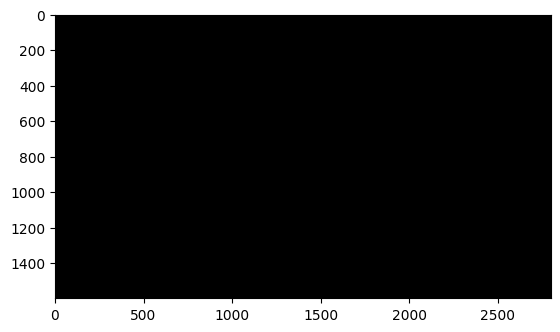

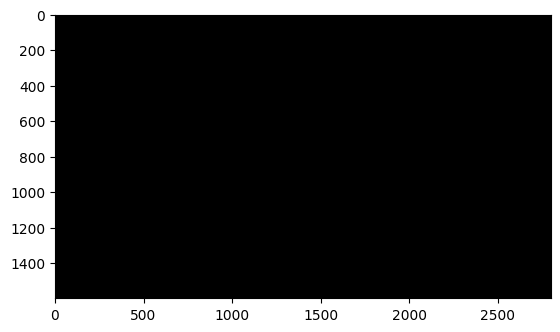

0


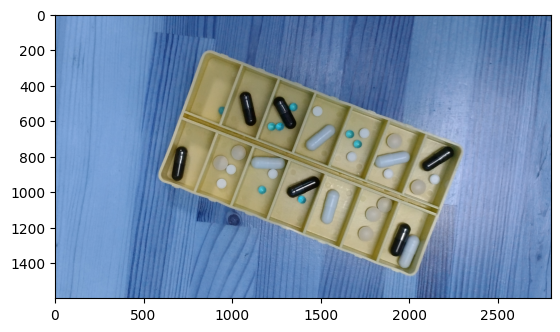

In [35]:
src = cv2.imread('calib.png')
src = cv2.imread('test_line.png')
src = cv2.imread('test.png')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
assert src is not None

image = src.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.inRange(image, (115, 0, 0), (255, 60, 60))
plt.imshow(image, cmap='gray')
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (15, 15))
image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(image, cmap='gray')
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (10, 10))
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(image, cmap='gray')
plt.show()

image = remove_small_objects(image > 0, min_size=100)
plt.imshow(image, cmap='gray')
plt.show()

contours, _ = cv2.findContours(image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = list(sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True))
print(len(contours))
plt.imshow(src)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
plt.show()

# KETO

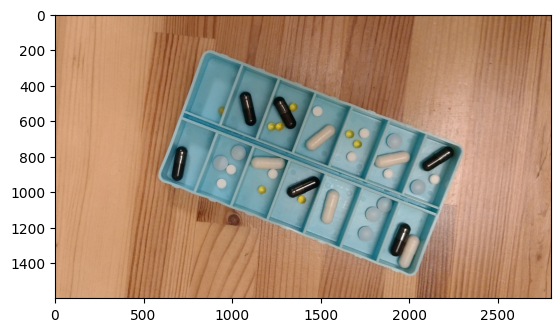

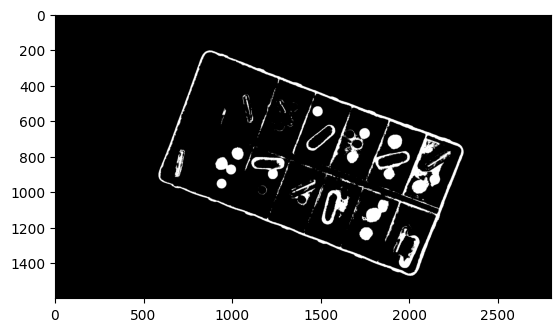

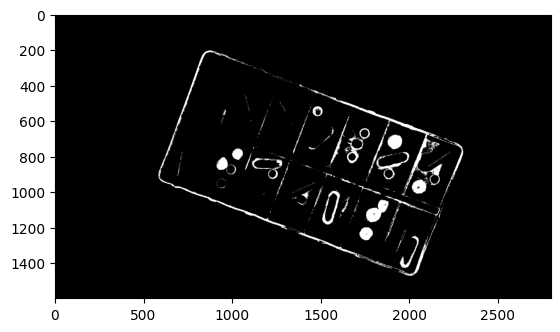

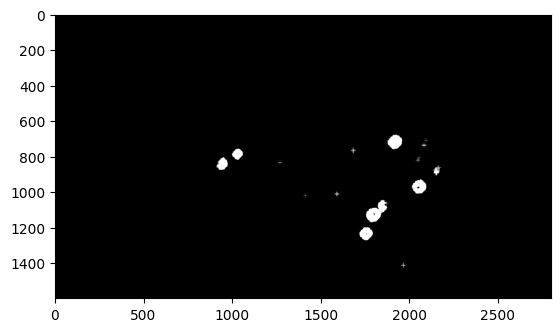

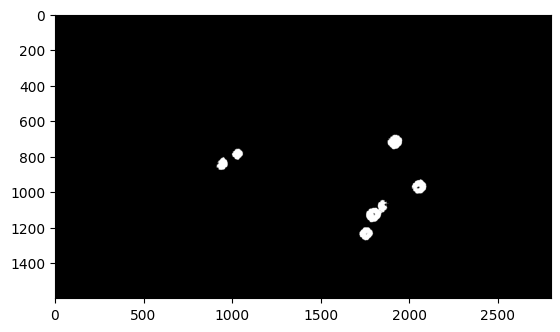

6


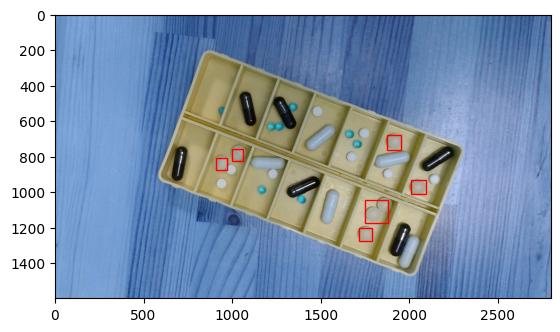

In [2]:
src = cv2.imread('calib.png')
src = cv2.imread('test_line.png')
src = cv2.imread('test.png')
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()
assert src is not None

img = src.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = img[..., 1].astype(np.uint8)
th, img = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY_INV)
img = (img / 255).astype(bool)
plt.imshow(img, cmap='gray')
plt.show()

img = (cv2.inRange(src.copy(), (140, 140, 140), (190, 190, 190)) & img).astype(np.uint8) * 255
plt.imshow(img, cmap='gray')
plt.show()


kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (25, 25))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(img, cmap='gray')
plt.show()

img = remove_small_objects(img > 0, min_size=2500)
plt.imshow(img, cmap='gray')
plt.show()

contours, _ = cv2.findContours(img.astype(np.uint8) * 255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = list(sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True))
print(len(contours))
plt.imshow(src)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
plt.show()